This is code for creating simple plots of daily Fitbit data in python. 

It will create the following plots:
* Time Series w/ rolling mean
* Histogram
* Density Plot parsed by day of the week 

Taken from [Bonnie Barrilleaux](http://bonniebarrilleaux.com/). 
Her Fitbit data post is avaiable here: [Freeing My Fitbit Data](http://bonniebarrilleaux.com/2013/12/22/freeing-my-fitbit-data/)
This code was copied from her [gist here](https://gist.github.com/bbarrilleaux/8090081#file-fitbitstats-py)

In [7]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib
import pylab
from matplotlib import pyplot
from scipy.stats import gaussian_kde

# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

In [8]:
#import data
data = pd.read_csv('FourYearSteps.csv', usecols = [0, 3], parse_dates = True)
data.head()

,date,combined
0,2/28/11,12687
1,3/1/11,8023
2,3/2/11,7834
3,3/3/11,20059
4,3/4/11,10436


In [13]:
#count and remove days where <50 steps were logged, 
#because those were when Fitbit wasn't working or I had no data.
data[data['combined'] <= 50].count()
data = data[data['combined'] > 50]
 
data['daynumber'] = data.date.map(lambda x: pd.to_datetime(x).weekday()) 
data['weekday'] = data.date.map(lambda x: pd.to_datetime(x).strftime("%a")) 
data['rollingmean'] = pd.rolling_mean(data['combined'], window = 30, min_periods = 0)

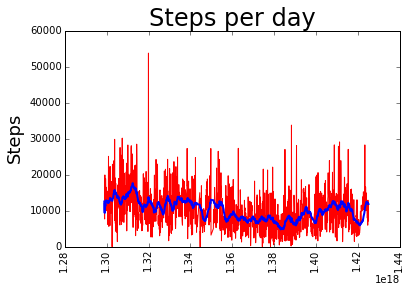

In [25]:
#Time series plot with rolling mean
pyplot.plot(pd.to_datetime(data['date']), data['combined'], "r", linewidth = 1)
pyplot.plot(pd.to_datetime(data['date']), data['rollingmean'], "b", linewidth = 2)
pyplot.xticks(rotation = 90)
pyplot.title('Steps per day', size = 24)
pyplot.ylabel('Steps', size = 18)
pyplot.subplots_adjust(bottom = .15, top = .9)
pyplot.savefig("FitbitStepsMovingAvg.png", fmt="png"); 
pyplot.show()

Fri
('Average number of steps:', 10041.687804878049)
('Percent of days exceeding 10,000 steps:', 48, '%')
Mon
('Average number of steps:', 10838.858536585365)
('Percent of days exceeding 10,000 steps:', 52, '%')
Sat
('Average number of steps:', 10122.234146341463)
('Percent of days exceeding 10,000 steps:', 44, '%')
Sun
('Average number of steps:', 10983.823529411764)
('Percent of days exceeding 10,000 steps:', 49, '%')
Thu
('Average number of steps:', 10014.341463414634)
('Percent of days exceeding 10,000 steps:', 46, '%')
Tue
('Average number of steps:', 9904.3640776699031)
('Percent of days exceeding 10,000 steps:', 49, '%')
Wed
('Average number of steps:', 10110.402912621359)
('Percent of days exceeding 10,000 steps:', 49, '%')


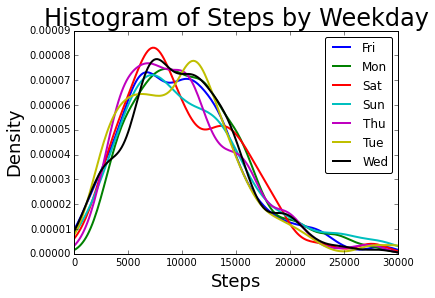

In [26]:
# Density plot broken into days of the week
sorteddata = data.sort_index(by = ['daynumber'], ascending = [True])
 
for key, grp in sorteddata.groupby(['weekday']):
	print(key)
	print('Average number of steps:', grp['combined'].mean())
	print('Percent of days exceeding 10,000 steps:', (grp[grp['combined'] > 10000].count()[1])*100/grp.count()[1], "%")
	density = gaussian_kde(grp['combined'])
	xnew = np.linspace(0,30000,200)
	density.covariance_factor = lambda : .25
	density._compute_covariance()
	pyplot.plot(xnew, density(xnew), label = key, linewidth = 2)
 
pyplot.legend(fancybox = True, fontsize = 12)
pyplot.title('Histogram of Steps by Weekday', size = 24)
pyplot.xlabel('Steps', size = 18)
pyplot.ylabel('Density', size = 18)
pyplot.subplots_adjust(left = .15, right = .9)
pyplot.savefig("FitbitDensityPlot.png", fmt="png"); 
pyplot.show()

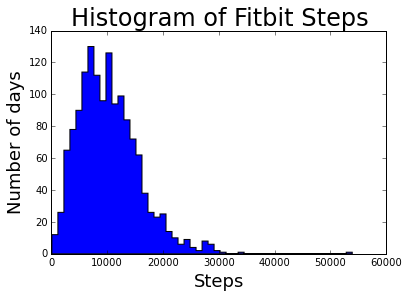

In [24]:
#histogram of steps
pyplot.hist(data['combined'], bins = 50, histtype = 'stepfilled')
pyplot.title('Histogram of Fitbit Steps', size = 24)
pyplot.xlabel('Steps', size = 18)
pyplot.ylabel('Number of days', size = 18)
pyplot.savefig("FitbitHistogram.png", fmt="png"); 
pyplot.show()

 